In [60]:
import nltk

In [61]:
#nltk.download_shell()

In [62]:
#messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
messages = []

for line in open('smsspamcollection/SMSSpamCollection'):
    #messages.append(line.rstrip())
    new_line = line.rstrip()
    messages.append(new_line)

In [63]:
for i in range(0,10):
    print(i, messages[i])

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [64]:
import pandas as pd

In [65]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection", sep='\t', names=['type', 'message'])

In [66]:
messages['length'] = messages['message'].apply(len)

In [67]:
messages

,type,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='type', ylabel='length'>

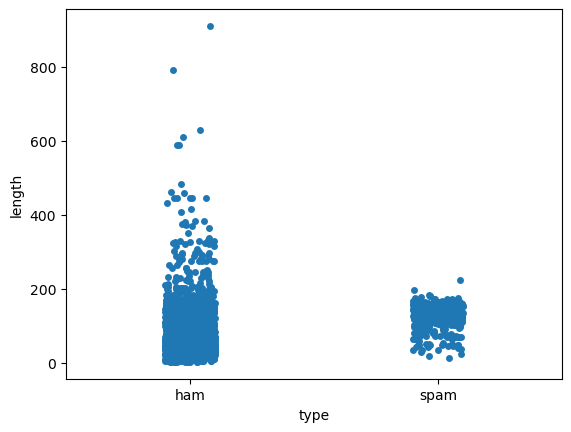

In [69]:
sns.stripplot(x= messages['type'], y= messages['length'])

In [70]:
import string

In [73]:
from nltk.corpus import stopwords

In [85]:
def preProcessing(mess):
    new_mess = ''
    for char in mess:
        if char not in string.punctuation:
            new_mess += char
    clean_mess = []
    for mess in new_mess.split():
        if mess.lower() not in stopwords.words('english'):
            clean_mess.append(mess)
    return clean_mess
    

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
bow_transformer = CountVectorizer(analyzer=preProcessing).fit(messages['message'])

In [90]:
mess4 = messages['message'][3]

In [91]:
print(mess4)

U dun say so early hor... U c already then say...


In [92]:
bow4 = bow_transformer.transform([mess4])

In [93]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [96]:
bow_transformer.get_feature_names_out()[9554]

'say'